# 1. Preliminary data inspection and cleaning
## a. Perform preliminary data inspection, checking for data types, missing values, and duplicates
## b. Remove any columns that might not be relevant for the analysis
# 2. Exploratory Data Analysis
## a. Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country
## b. Analyze the different aspects of the death events. For example:
- What is the number of victims (deaths) in each accident?
- How many times did tesla drivers die?
- What is the proportion of events in which one or more occupants died?
- What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?
- How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?
- What is the frequency of Tesla colliding with other vehicles?
## c. Study the event distribution across models
## d. Check the distribution of verified Tesla autopilot deaths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./Tesla - Deaths.csv')

df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,"Note: AutoPilot released Oct 14, 2015",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# last several rows, where case # is null, are used to summarize data. Drop them.

df = df[~df['Case #'].isnull()]

df.tail()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
289,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,...,-,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
292,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN
293,1.0,2013.0,4/2/2013,USA,CA,Tesla veers into opposite lane,2.0,-,-,2,...,-,-,https://web.archive.org/web/20150425055520/ht...,https://web.archive.org/web/20150425055520/ht...,https://web.archive.org/web/20150425055520/ht...,NaN,Alberto Casique-Salinas,Armando Garcia-Gonzales,NaN,NaN


In [5]:
# Drop Unnamed: 16 and 17

df.drop(['Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [6]:
# Verify that sources are filled for all entries. If so, drop the column as we know every case has a verified source of info.

df[' Source '].isna().sum()

0

In [7]:
df.drop([' Source '], axis=1, inplace=True)

df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [8]:
# Deceased 1 - 4 are personally identifiable data. Drop themn.
# Drop Note. Irrelevant for analysis
# Drop Year. It's redundant. See the Date column.

df.drop(['Year', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ', ' Note '], axis=1, inplace=True)

df.columns

Index(['Case #', 'Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Date                                                                  294 non-null    object 
 2    Country                                                              294 non-null    object 
 3    State                                                                294 non-null    object 
 4    Description                                                          294 non-null    object 
 5    Deaths                                                               294 non-null    float64
 6    Tesla driver                                                         289 non-null    object 
 7    Tes

In [10]:
# Convert ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ', ' Cyclists/ Peds ', ' TSLA+cycl / peds '
# , ' Verified Tesla Autopilot Deaths ', and ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ' columns to integer

def convert_col_to_int(col):
    df.replace({col : ' - '}, 0, inplace=True)
    df.replace({col : '-'}, 0, inplace=True)
    df.fillna({col : 0}, inplace=True)
    df[col] = df[col].astype(int)

cols_to_conv_to_int = ['Case #',
                       ' Tesla driver ',
                       ' Tesla occupant ',
                       ' Other vehicle ',
                       ' Cyclists/ Peds ',
                       ' TSLA+cycl / peds ',
                       ' Verified Tesla Autopilot Deaths ',
                       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ']

for x in cols_to_conv_to_int:
    convert_col_to_int(x)
    
df

,Case #,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,-,-,0,0
1,293,1/7/2023,Canada,-,Tesla crashes,1.0,1,0,0,0,1,-,-,0,0
2,292,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,-,-,0,0
3,291,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,-,-,0,0
4,290,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,0,0,0,1,1,-,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,0,0,1,0,0,-,-,0,0
290,4,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,0,0,0,1,-,-,0,0
291,3,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,0,0,3,0,0,-,-,0,0
292,2,11/2/2013,USA,CA,Tesla kills cyclist,1.0,0,0,0,1,1,-,-,0,0


In [11]:
# convert Date column to datetime
# convert Deaths to integer

df['Date'] = pd.to_datetime(df['Date'])
df[' Deaths '] = df[' Deaths '].astype(int)

In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Case #                                                                294 non-null    int64         
 1   Date                                                                  294 non-null    datetime64[ns]
 2    Country                                                              294 non-null    object        
 3    State                                                                294 non-null    object        
 4    Description                                                          294 non-null    object        
 5    Deaths                                                               294 non-null    int64         
 6    Tesla driver                                  

In [13]:
df.corr(numeric_only=True)

,Case #,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
Case #,1.000000,0.100409,0.095920,0.038629,-0.078148,0.049682,0.107401,-0.019238,0.012003
Deaths,0.100409,1.000000,0.102009,0.478662,0.356172,-0.056227,0.397959,0.051066,0.011986
Tesla driver,0.095920,0.102009,1.000000,0.097300,-0.488344,-0.333392,0.506086,-0.038153,-0.080768
Tesla occupant,0.038629,0.478662,0.097300,1.000000,-0.238538,-0.137777,0.555134,-0.002898,-0.035292
Other vehicle,-0.078148,0.356172,-0.488344,-0.238538,1.000000,-0.264917,-0.659104,0.102904,0.098322
Cyclists/ Peds,0.049682,-0.056227,-0.333392,-0.137777,-0.264917,1.000000,0.243219,-0.030496,-0.006211
TSLA+cycl / peds,0.107401,0.397959,0.506086,0.555134,-0.659104,0.243219,1.000000,-0.046256,-0.068039
Verified Tesla Autopilot Deaths,-0.019238,0.051066,-0.038153,-0.002898,0.102904,-0.030496,-0.046256,1.000000,0.863355
Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,0.012003,0.011986,-0.080768,-0.035292,0.098322,-0.006211,-0.068039,0.863355,1.000000


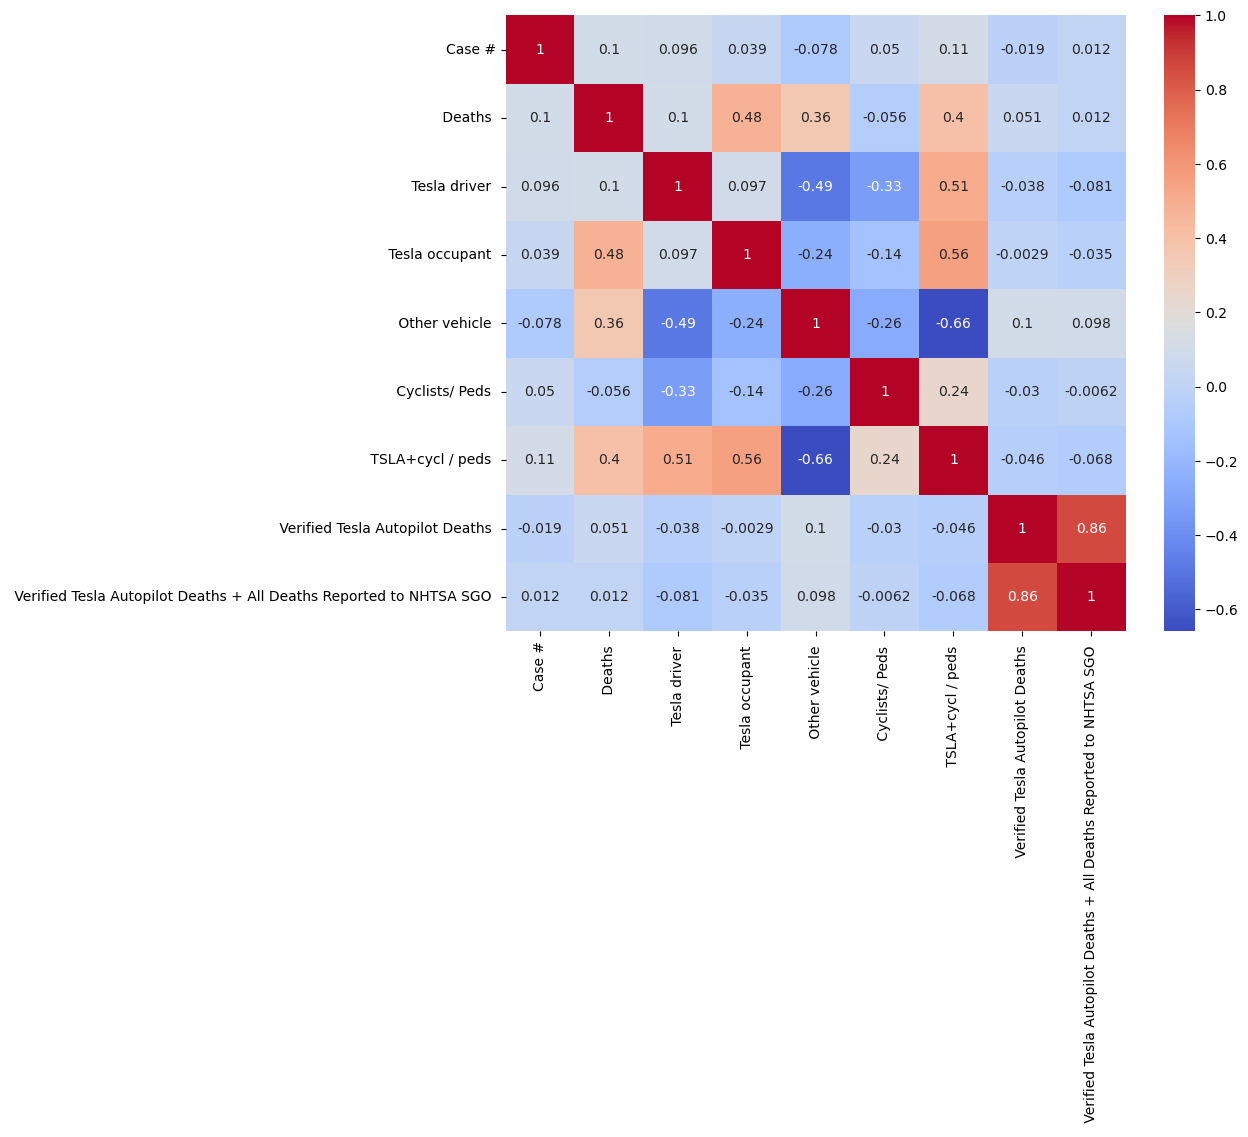

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm', annot=True)
plt.show()

## Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country


In [ ]:
# barplot, timeline as X axis

## What is the number of victims (deaths) in each accident?

See the "Deaths" column

## How many times did tesla drivers die?

In [15]:
df[' Tesla driver '].value_counts()

# Based below, 117 Tesla drivers died

 Tesla driver 
0    177
1    117
Name: count, dtype: int64

## What is the proportion of events in which one or more occupants died?

In [16]:
df[' Tesla occupant '].value_counts()

 Tesla occupant 
0    251
1     39
2      3
3      1
Name: count, dtype: int64

In [17]:
(39 + 3 + 1) / 294

0.14625850340136054

One or more occupants died in 14.6% of the events

## What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

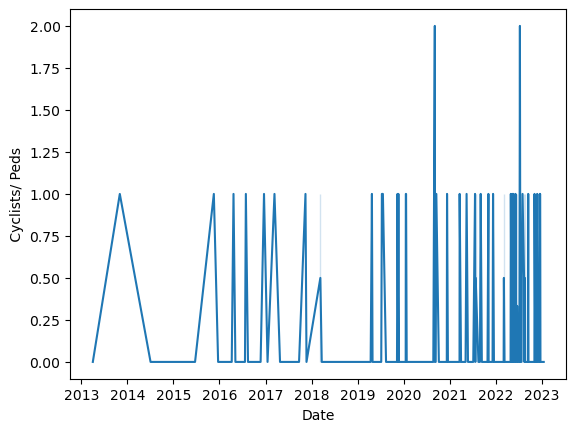

In [18]:
sns.lineplot(x='Date', y=' Cyclists/ Peds ', data=df[['Date', ' Cyclists/ Peds ']])
plt.show()

Accidents involving cyclists/pedestrians have been happening more frequently in the recent past but that may be because there are more Teslas out there. However, we are not privided with that data point and it is purely speculative.

## How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

In [19]:
df1 = df.loc[((df[' Tesla driver '] > 0) | (df[' Tesla occupant '] > 0)) & (df[' Cyclists/ Peds '] > 0)]

print(df1.shape[0])
df1

1


,Case #,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
116,178,2021-09-04,USA,FL,"Tesla runs stop sign, crashes into house",2,0,1,0,1,2,S,-,0,0


In [20]:
# alternative logic. It should give the same result assuming there is no data corruption.

df1 = df.loc[(df[' Cyclists/ Peds '] > 0) & (df[' TSLA+cycl / peds '] > df[' Cyclists/ Peds '])]

print(df1.shape[0])
df1 # to verify that the same row(s) is/are returned

1


,Case #,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
116,178,2021-09-04,USA,FL,"Tesla runs stop sign, crashes into house",2,0,1,0,1,2,S,-,0,0


Only once

## What is the frequency of Tesla colliding with other vehicles?

In [21]:
df.loc[(df['Case #'].isin([173, 224, 275, 293]))]

,Case #,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
1,293,2023-01-07,Canada,-,Tesla crashes,1,1,0,0,0,1,-,-,0,0
19,275,2022-10-19,USA,CA,Multicar crash,1,1,0,0,0,1,1,-,0,0
70,224,2022-05-17,USA,CO,Fiery crash,1,1,0,0,0,1,3,1,0,1
121,173,2021-07-26,Netherlands,-,"Four vehicle collision, Tesla catches fire",1,0,0,0,0,0,-,-,0,0


We do not have enough information in the dataset to accurately analyze this.

"Other vehicle" column only shows fatalities in other vehicles, not whether a collision with other vehicles occurred. We only know for sure a collision occurred when the value is greater than 0. When it's 0, we'd have to read the description to make that determination, e.g. case #s 173 and 275.

Even if we were to analyze the Description, some of them are so vague we cannot come to a conclusion, e.g. case #s 224 and 293.

We would have to go back to source articles, read through and analyze each one to make this determination and perhaps add another column in the dataset to show whether or not Tesla collided with another vehicle for each case.

##  Study the event distribution across models

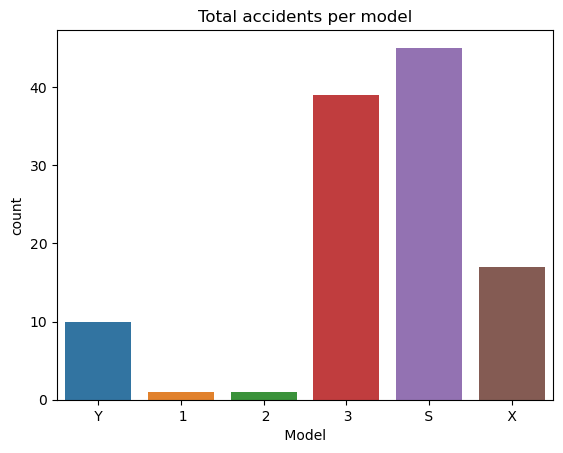

In [22]:
df_known_model = df.loc[(df[' Model '] != ' - ')] # Omit rows where model is unknown

sns.countplot(x =' Model ', data = df_known_model)
plt.title('Total accidents per model')
plt.show()

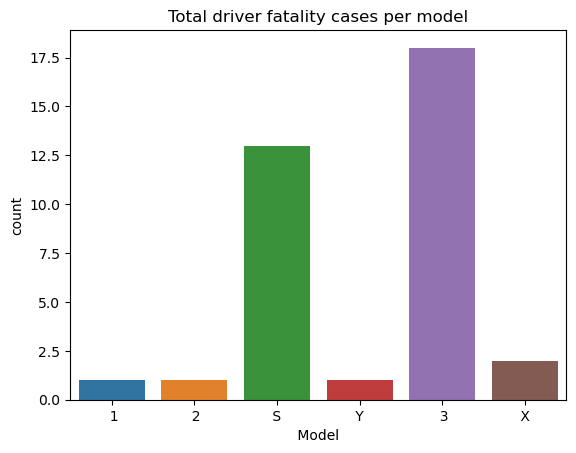

In [23]:
sns.countplot(x =' Model ', data = df_known_model.loc[(df[' Tesla driver '] > 0)])
plt.title('Total driver fatality cases per model')
plt.show()

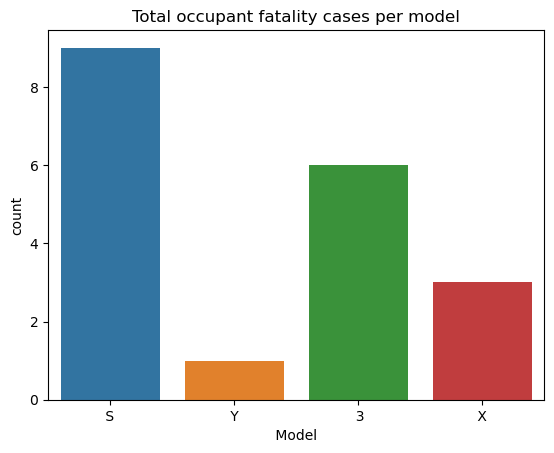

In [24]:
sns.countplot(x =' Model ', data = df_known_model.loc[(df[' Tesla occupant '] > 0)])
plt.title('Total occupant fatality cases per model')
plt.show()

## Check the distribution of verified Tesla autopilot deaths

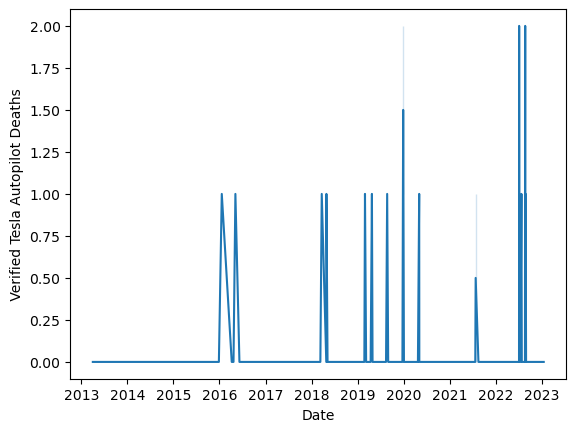

In [25]:
sns.lineplot(x='Date', y=' Verified Tesla Autopilot Deaths ', data=df)
plt.show()